In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import sklearn.cluster as sc

In [33]:
data = pd.read_csv("multiple3.txt",header = None, names=["x1", "x2"])
data

,x1,x2
0,1.96,-0.09
1,2.84,3.16
2,4.74,1.84
3,6.36,4.89
4,1.77,1.55
...,...,...
195,6.64,6.66
196,2.15,0.75
197,3.26,6.08
198,5.72,1.98


<AxesSubplot:xlabel='x3', ylabel='x4'>

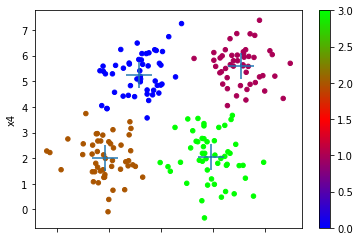

In [34]:
# Kmeans
model = sc.KMeans(n_clusters = 4)
model.fit(data)
labels = model.labels_
ax = data.plot.scatter(x = 'x1', y = 'x2', c = labels, cmap = 'brg')
#这部分不能分到另外一个模块去写，相当于用了ax是在上面的图的基础上去画的
centers = model.cluster_centers_
centers = pd.DataFrame(centers, columns=['x3','x4'])
centers.plot.scatter(x='x3', y='x4',s = 700, marker='+', ax = ax)

In [39]:
# 轮廓系数校验
v = sm.silhouette_score(data, labels, sample_size = len(data), metric='euclidean')
print(v)

0.5773232071896658


In [ ]:
#均值漂移
bw = sc.estimate_bandwidth(data, n_samples=len(data), quantile=0.1)
model = sc.MeanShift(bandwidth=bw, bin_seeding = True)
model.fit(data)